In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from PIL import Image
import requests
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
import warnings
from bs4 import BeautifulSoup
from io import StringIO
import httpx
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick

In [2]:
font_properties = {'family': 'Arial', 'size': 12}

font_properties_titles = {'family': 'Arial', 'size': 20}

font_properties_axes = {'family': 'Arial', 'size': 16}

sns.set_theme(style='whitegrid',
              palette='deep',
              font='Arial',
              font_scale=1.5,
              color_codes=True,
              rc=None)

mpl.rcParams['figure.dpi'] = 300

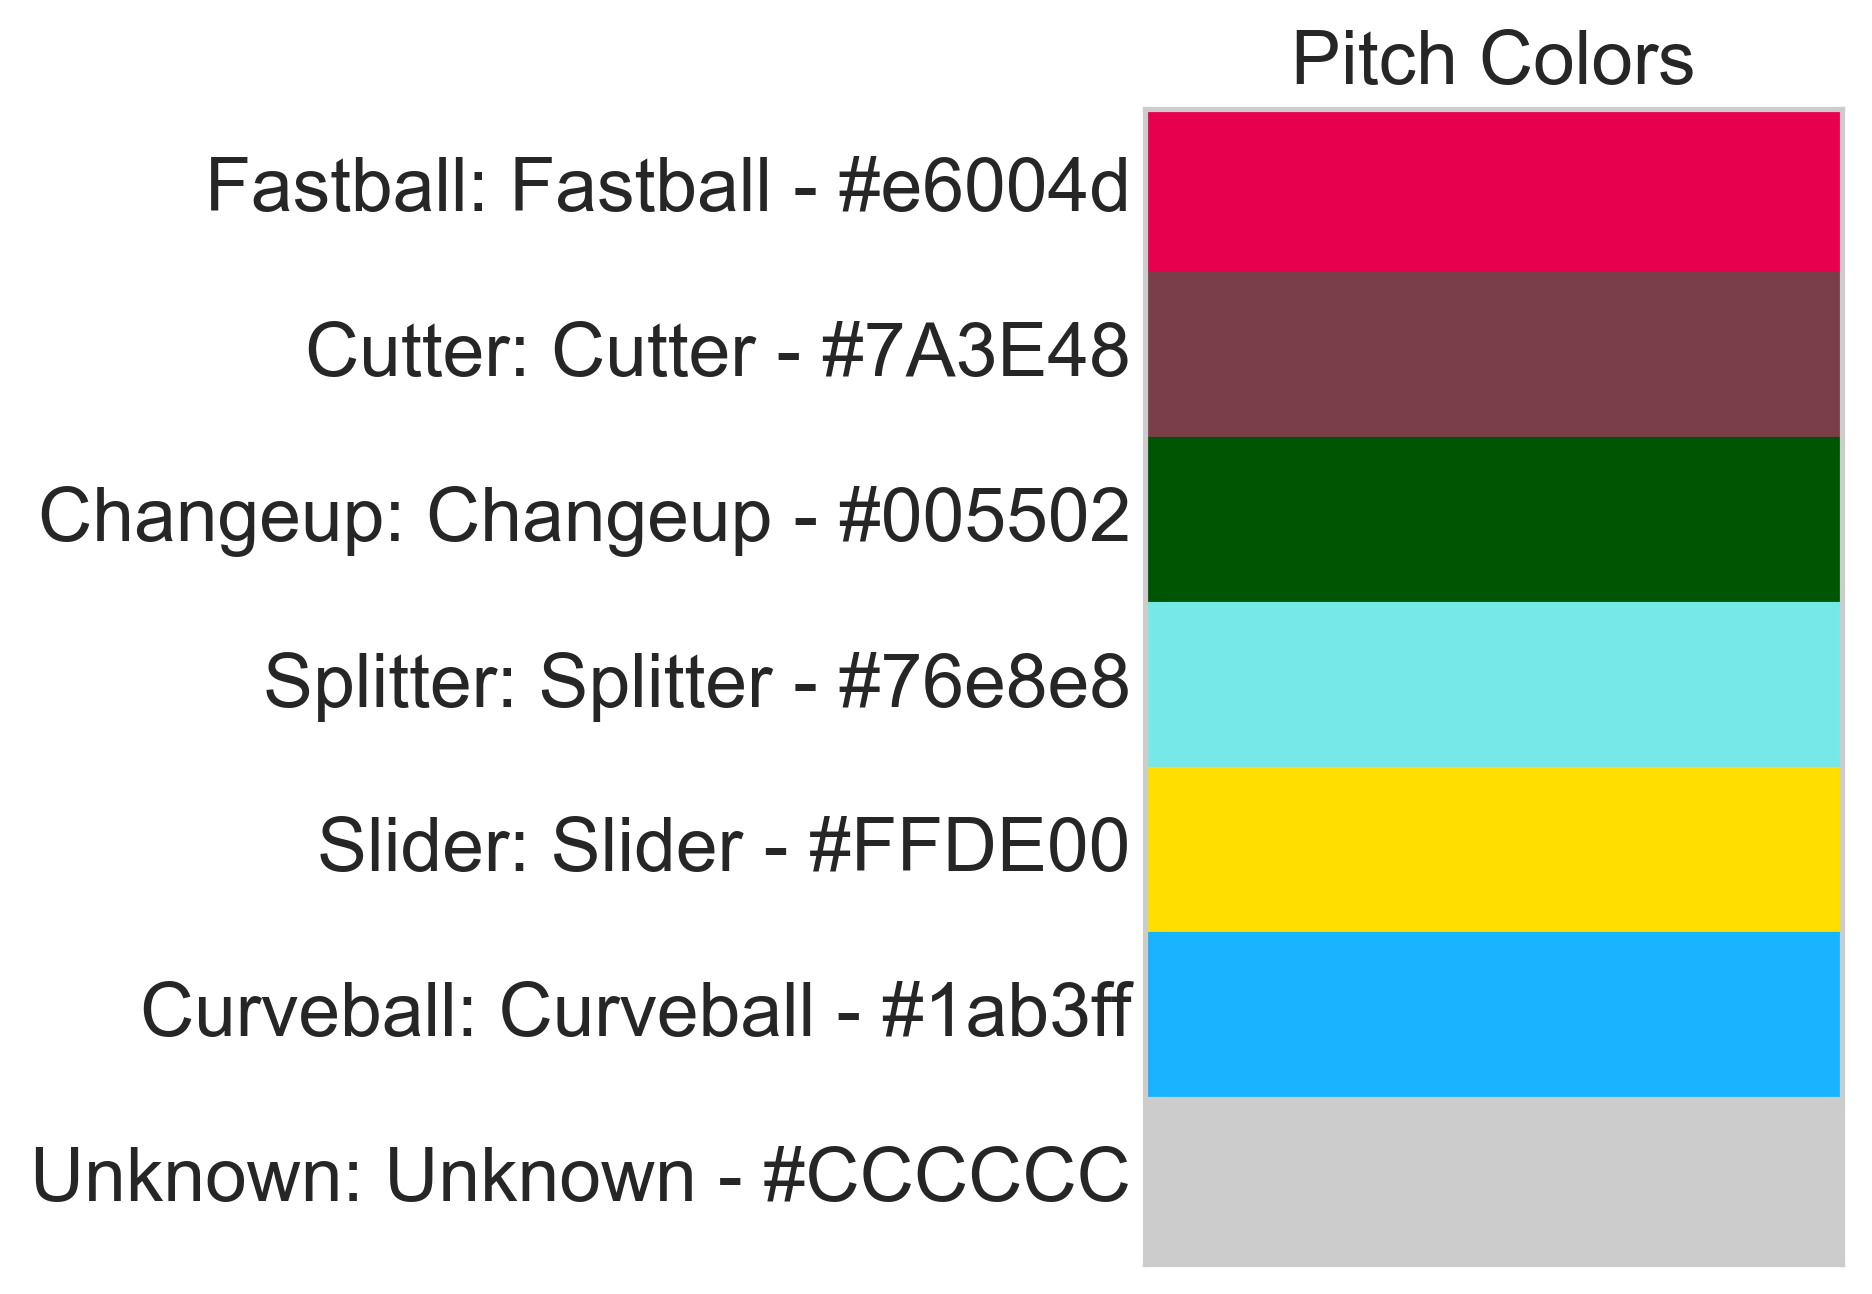

In [3]:
#May need to add to this?
pitch_colors = {
    'Fastball': {'color': '#e6004d', 'name': 'Fastball'},
    'Cutter': {'color': '#7A3E48', 'name': 'Cutter'},
    'Changeup': {'color': '#005502', 'name': 'Changeup'},
    'Splitter': {'color': '#76e8e8', 'name': 'Splitter'},
    'Slider': {'color': '#FFDE00', 'name': 'Slider'},
    'Curveball': {'color': '#1ab3ff', 'name': 'Curveball'},
    'Unknown': {'color': '#CCCCCC', 'name': 'Unknown'},
}

dict_color = dict(zip(pitch_colors.keys(), [pitch_colors[key]['color'] for key in pitch_colors]))

dict_pitch = dict(zip(pitch_colors.keys(), [pitch_colors[key]['name'] for key in pitch_colors]))

fig, ax = plt.subplots(figsize=(3, 5))

for i, Pitch_Type in enumerate(pitch_colors):
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=pitch_colors[Pitch_Type]['color']))
    ax.text(-0.02, i + 0.5, f'{Pitch_Type}: {pitch_colors[Pitch_Type]["name"]} - {pitch_colors[Pitch_Type]["color"]}', va='center', ha='right')

ax.set_ylim(0, len(pitch_colors))
ax.set_yticks([])
ax.set_ylabel('')

ax.set_xticks([])
ax.set_xlabel('')
ax.invert_yaxis()

ax.set_title('Pitch Colors')

plt.show()

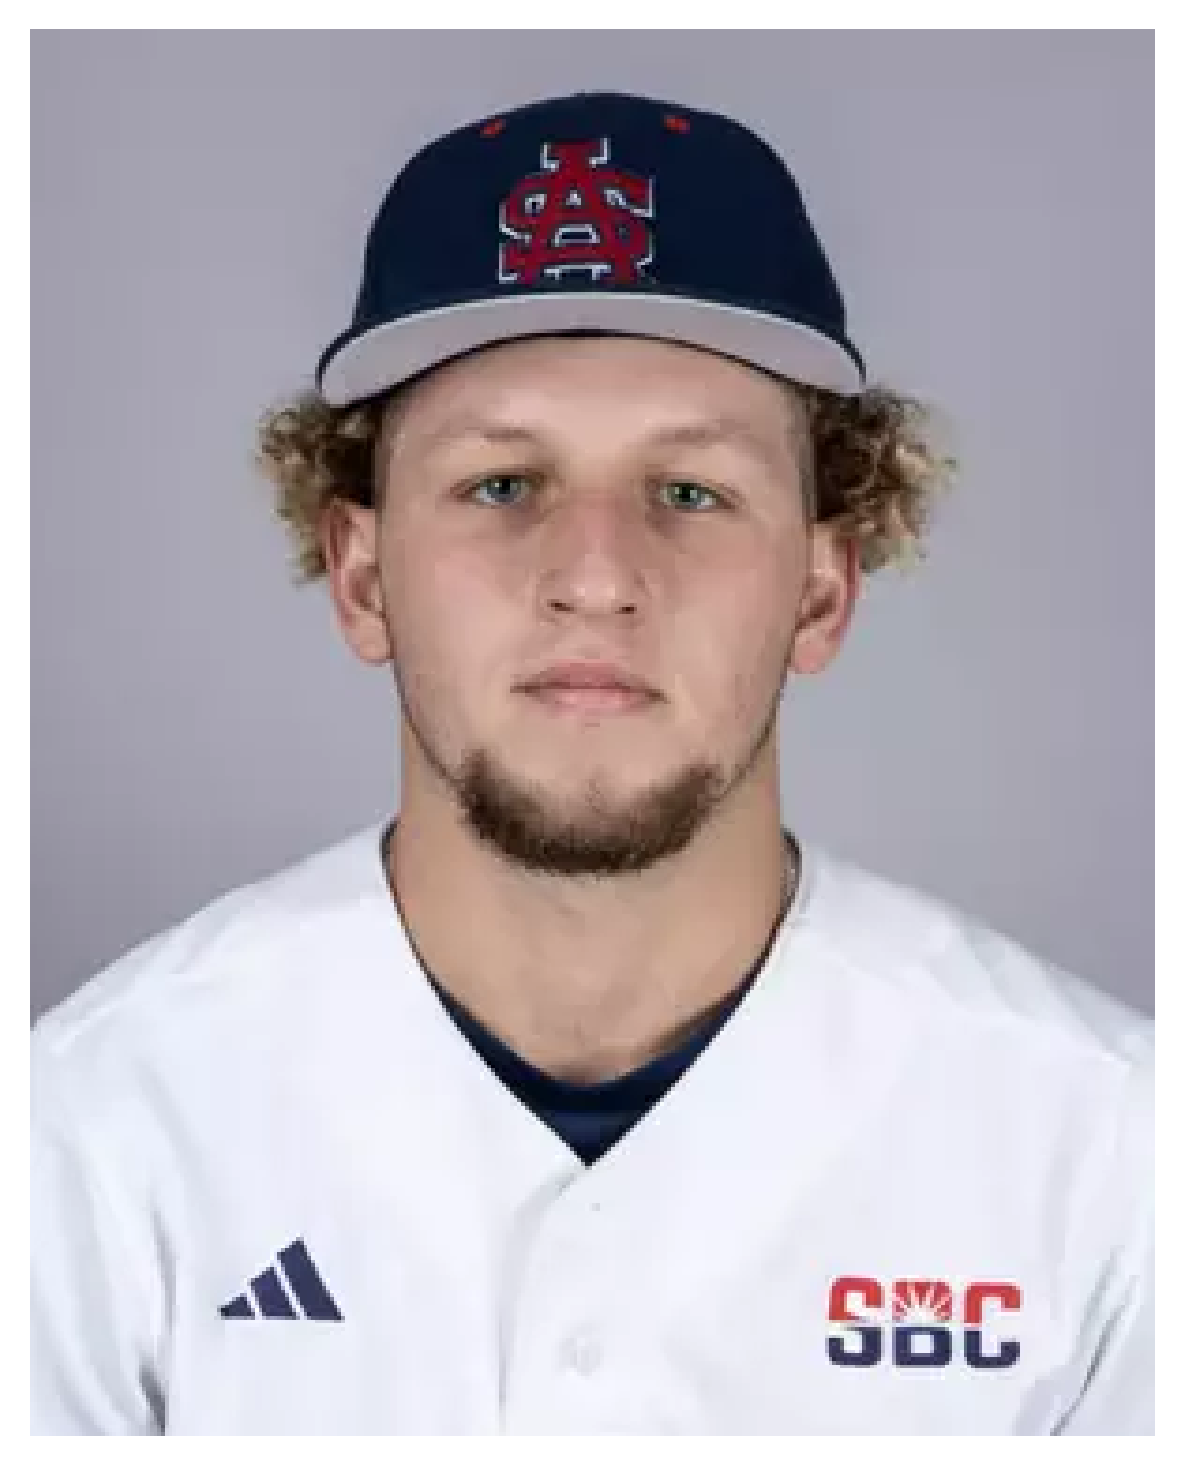

In [4]:
def player_headshot(ax: plt.Axes):

    #CHANGE, get from team website if possible
    url = f'https://usajaguars.com/images/2025/1/7/59147930_Shineflew_-Jaxon_0002_2bBP3.jpg?width=300'

    response = requests.get(url)

    img = Image.open(BytesIO(response.content))

    img_width, img_height = img.size

    image = OffsetImage(img, zoom=.9, resample=True)

    ab = AnnotationBbox(image, (0.5, 0.5), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)

    ax.add_artist(ab)

    ax.axis('off')

fig, ax = plt.subplots(figsize=(2, 2)) 
player_headshot(ax=ax)
plt.show()

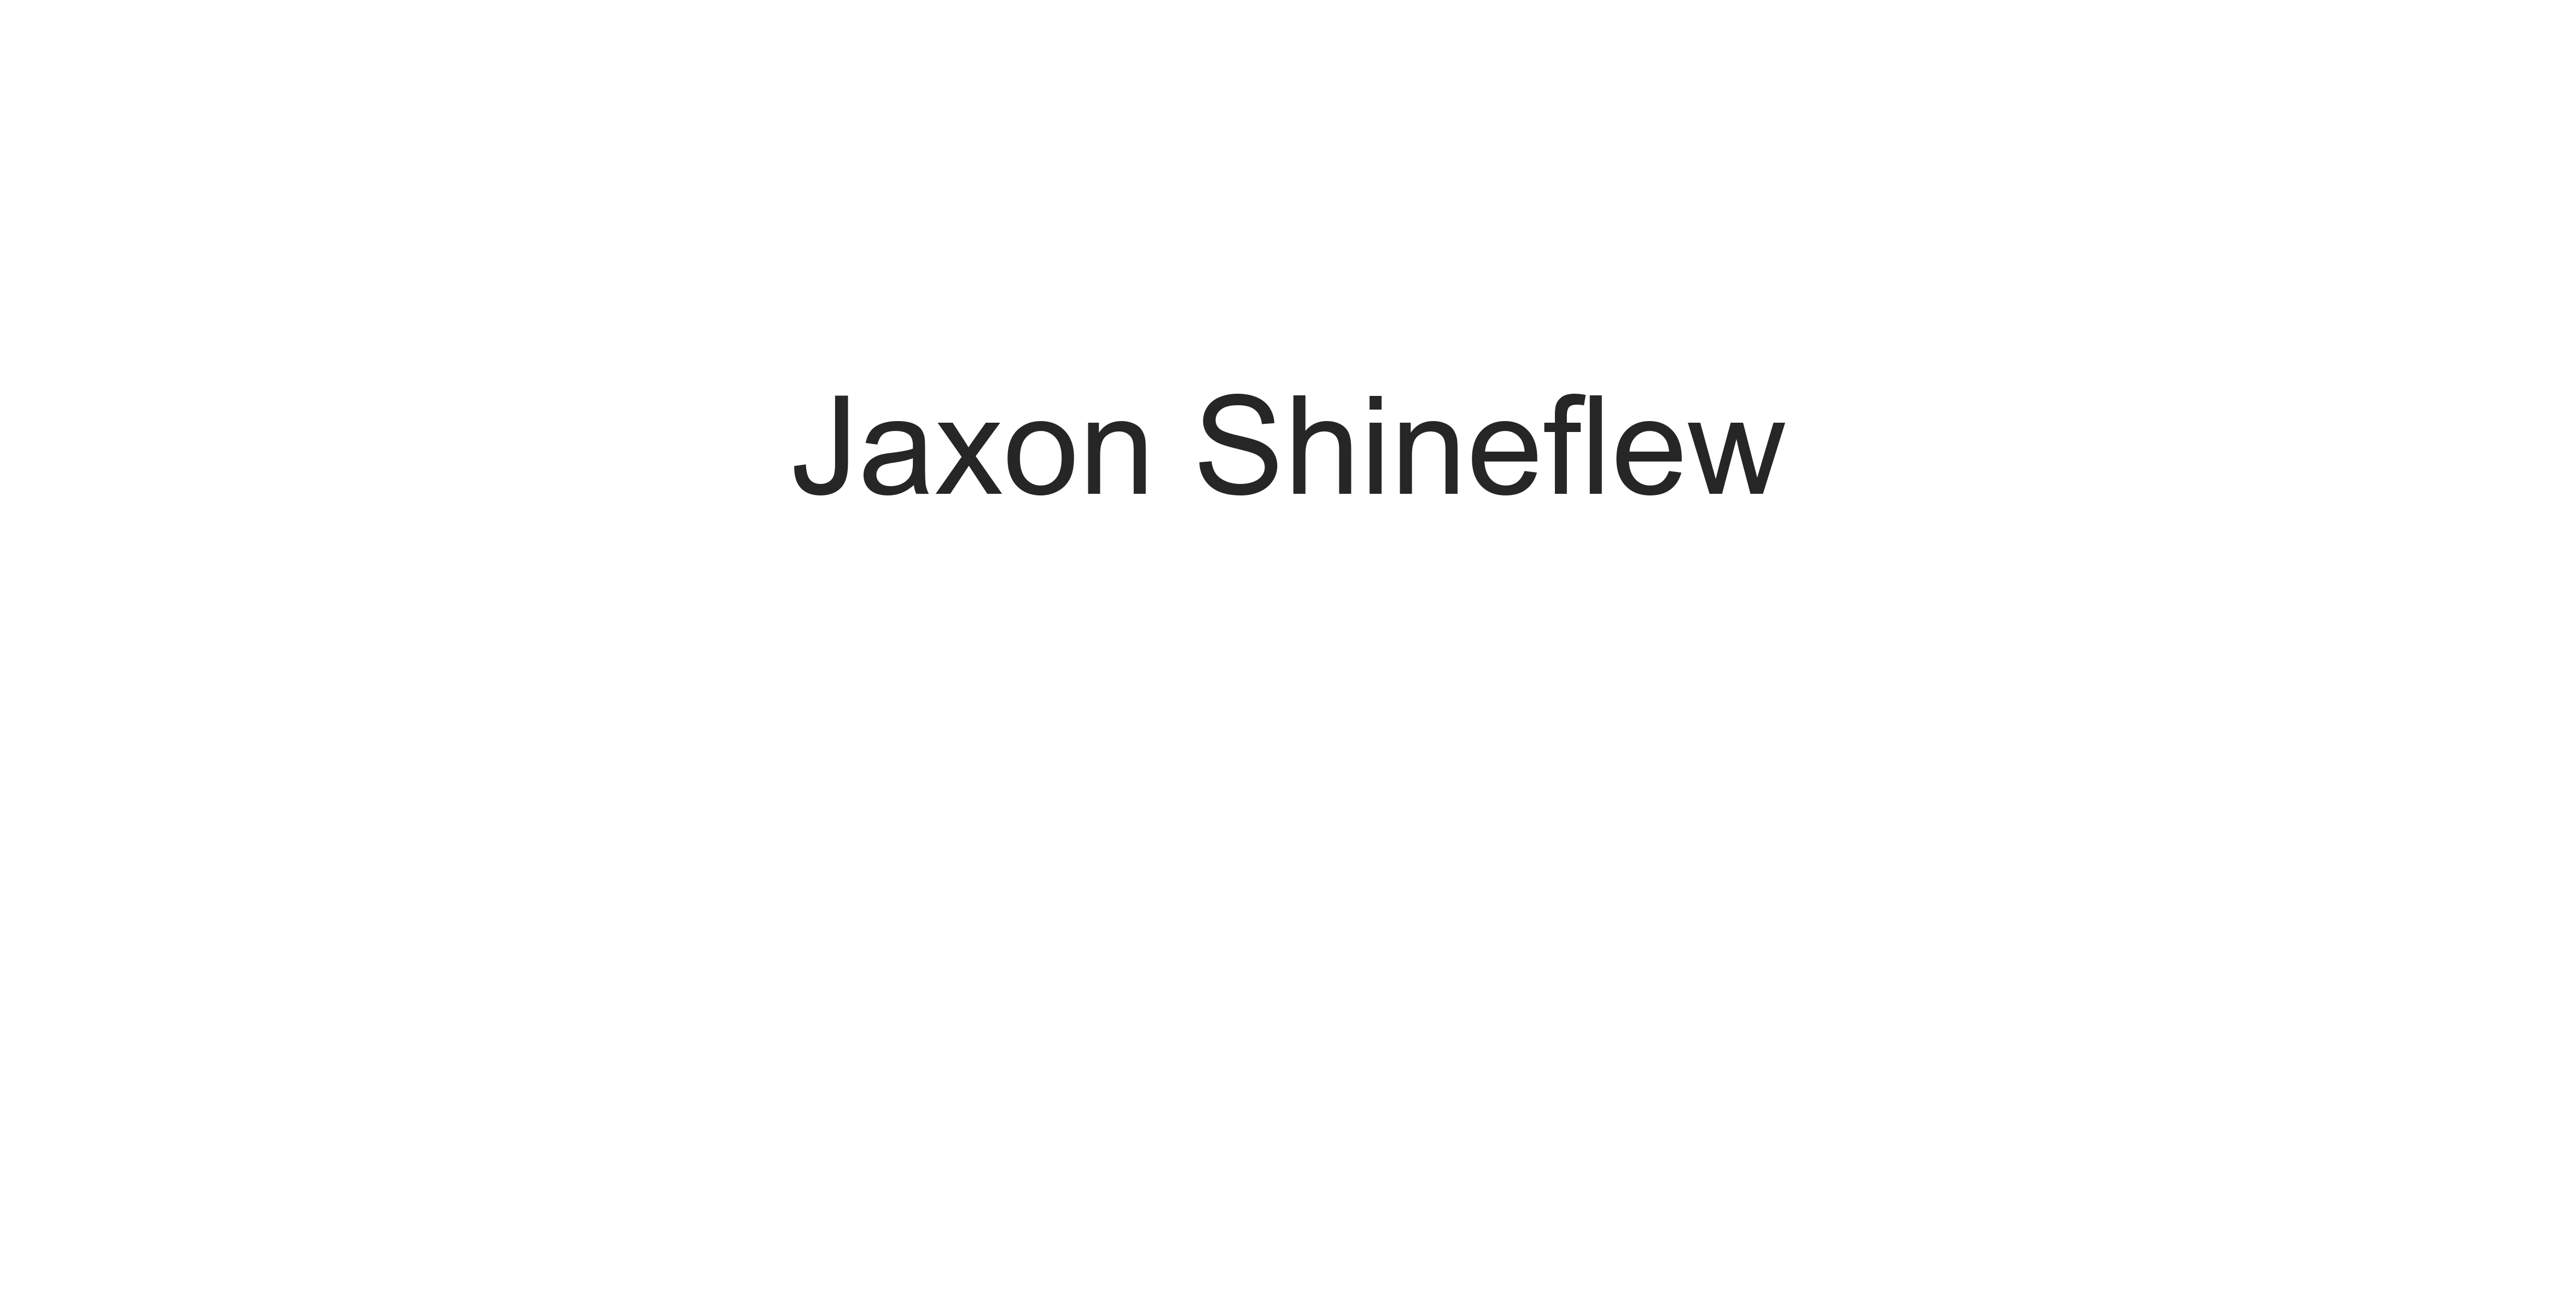

In [5]:
def player_name(ax: plt.Axes):

    #CHANGE
    player_name = "Jaxon Shineflew"
    ax.text(0.5, .65, f'{player_name}', va='center', ha='center', fontsize=60)
    
    ax.axis('off')
    
player_name(ax=plt.subplots(figsize=(20, 10))[1])

In [6]:
def notes(fig, x, y, text, fontsize=12, fontweight='normal', color='black'):

    fig.text(x, y, text, fontsize=fontsize, fontweight=fontweight, color=color, ha='left', va='top')

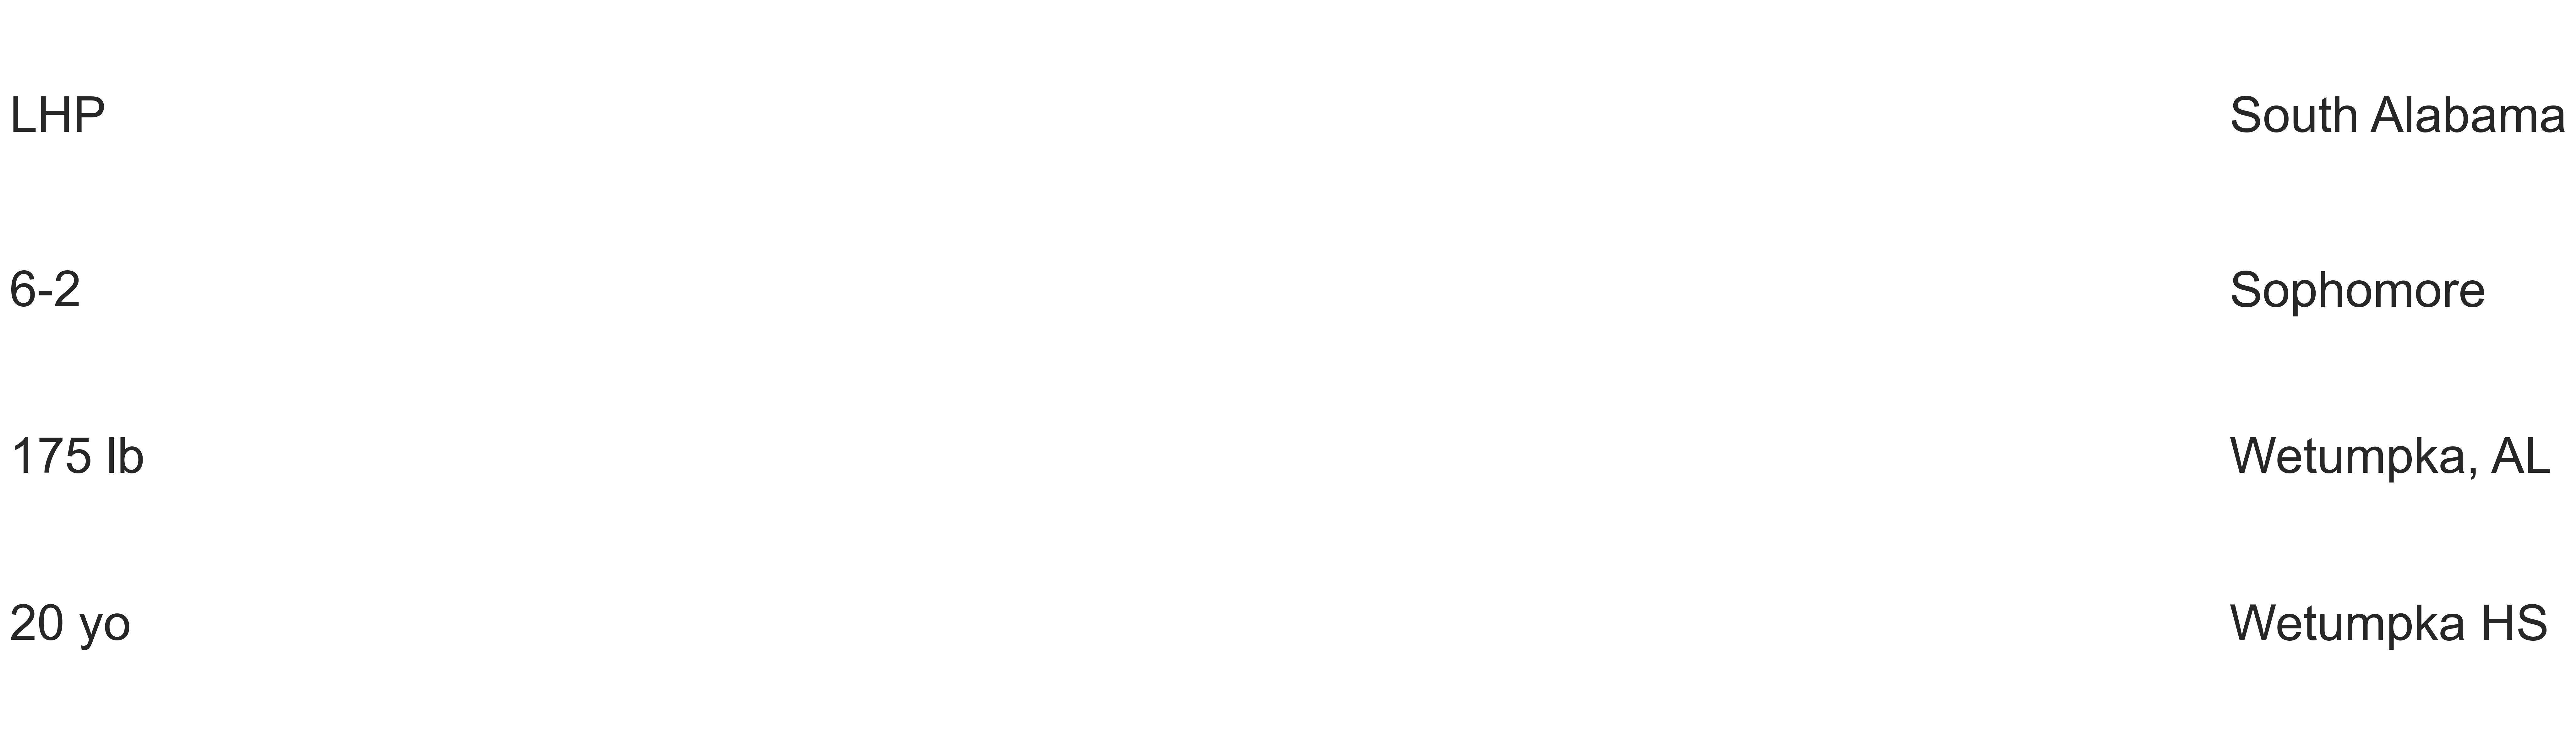

In [131]:
def player_bio(ax: plt.Axes):

    #CHANGE
    pitcher_hand = "LHP"
    height = "6-2"
    weight = "175 lb"
    age = "20 yo"
    college = "South Alabama"
    year = "Sophomore"
    home_town = "Wetumpka, AL"
    high_school = "Wetumpka HS"
    
    ax.text(-.15, .88, f'{pitcher_hand}', va='top', ha='left', fontsize=38)
    ax.text(-.15, 0.64, f'{height}', va='top', ha='left', fontsize=38)
    ax.text(-.15, 0.41, f'{weight}', va='top', ha='left', fontsize=38)
    ax.text(-.15, 0.18, f'{age}', va='top', ha= 'left', fontsize=38)
    ax.text(1.37, .88, f'{college}', va='top', ha='left', fontsize=38)
    ax.text(1.37, 0.64, f'{year}', va='top', ha='left', fontsize=38)
    ax.text(1.37, 0.41, f'{home_town}', va='top', ha='left', fontsize=38)
    ax.text(1.37, 0.18, f'{high_school}', va='top', ha= 'left', fontsize=38)
    
    ax.axis('off')

player_bio(ax=plt.subplots(figsize=(20, 10))[1])

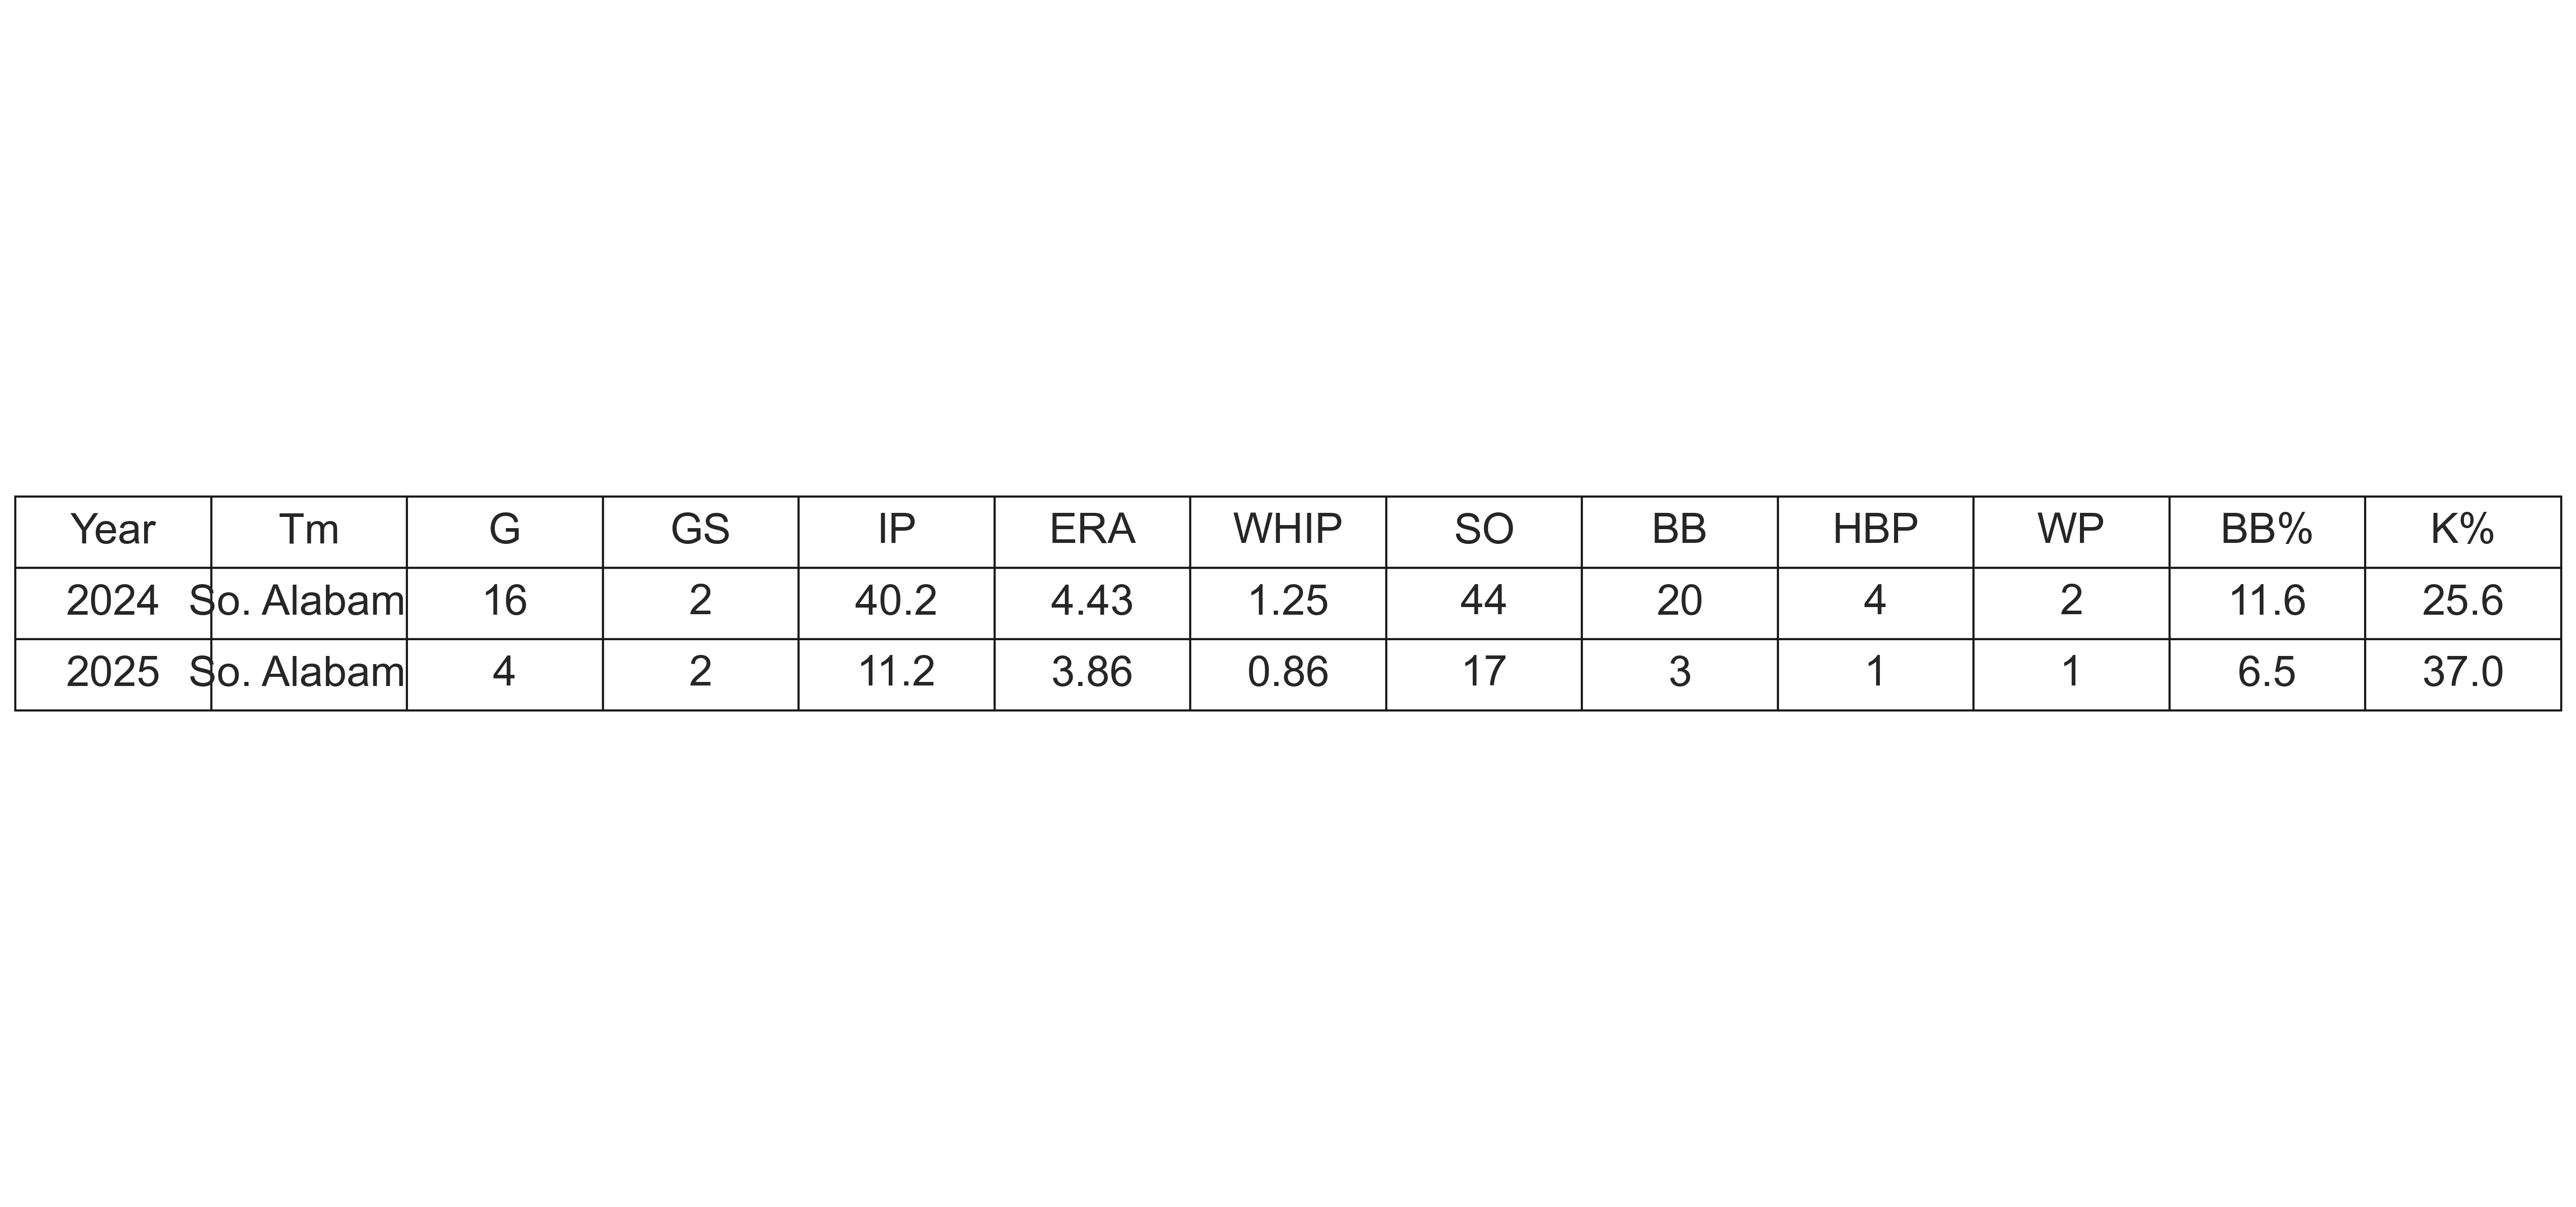

In [57]:
def basic_stats_table(ax: plt.Axes):
    
    warnings.filterwarnings("ignore", category=FutureWarning)

    url = "https://www.baseball-reference.com/register/player.fcgi?id=shinef000jax"

    headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
    }

    response = httpx.get(url, headers=headers)

    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table', id='standard_pitching')

    df = pd.read_html(StringIO(str(table)))[0]

    df.columns = df.columns.str.strip()
    df['Tm'] = df['Tm'].str.strip()

    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    df = df.dropna(subset=['Year'])
    
    df["Tm"] = df["Tm"].str.replace("\u00A0", " ").str.strip()

    filtered_df = df[
        (df["Year"].isin([2024, 2025])) & (df["Tm"].isin(["South Alabama"])) # CHANGE
    ].copy()

    filtered_df["Tm"] = filtered_df["Tm"].replace("South Alabama", "So. Alabama")

    filtered_df["BF"] = pd.to_numeric(filtered_df["BF"], errors='coerce')

    filtered_df["BB%"] = (filtered_df["BB"] / filtered_df["BF"]) * 100
    filtered_df["K%"] = (filtered_df["SO"] / filtered_df["BF"]) * 100

    filtered_df["BB%"] = filtered_df["BB%"].map("{:.1f}".format)
    filtered_df["K%"] = filtered_df["K%"].map("{:.1f}".format)

    final_df = filtered_df[["Year", "Tm", "G", "GS", "IP", "ERA", "WHIP", "SO", "BB", "HBP", "WP", "BB%", "K%"]]

    final_df = final_df.copy()

    final_df.loc[:, "Year"] = final_df["Year"].astype(int)
    int_cols = ["SO", "BB", "HBP", "WP"]
    for col in int_cols:
        final_df.loc[:, col] = final_df[col].astype(int)

    final_df.loc[:, "ERA"] = final_df["ERA"].astype(float).map("{:.2f}".format)
    final_df.loc[:, "WHIP"] = final_df["WHIP"].astype(float).map("{:.2f}".format)
    final_df["Year"] = final_df["Year"].astype(int)

    basic_stats_table = ax.table(
        cellText=final_df.values, 
        colLabels=final_df.columns, 
        loc="center", 
        cellLoc="center", 
        colLoc="center"
    )

    basic_stats_table.auto_set_font_size(False)
    basic_stats_table.set_fontsize(20)
    basic_stats_table.scale(2.15, 2.8)

    ax.axis("off")

basic_stats_table(ax=plt.subplots(figsize=(10, 10))[1])
plt.show()

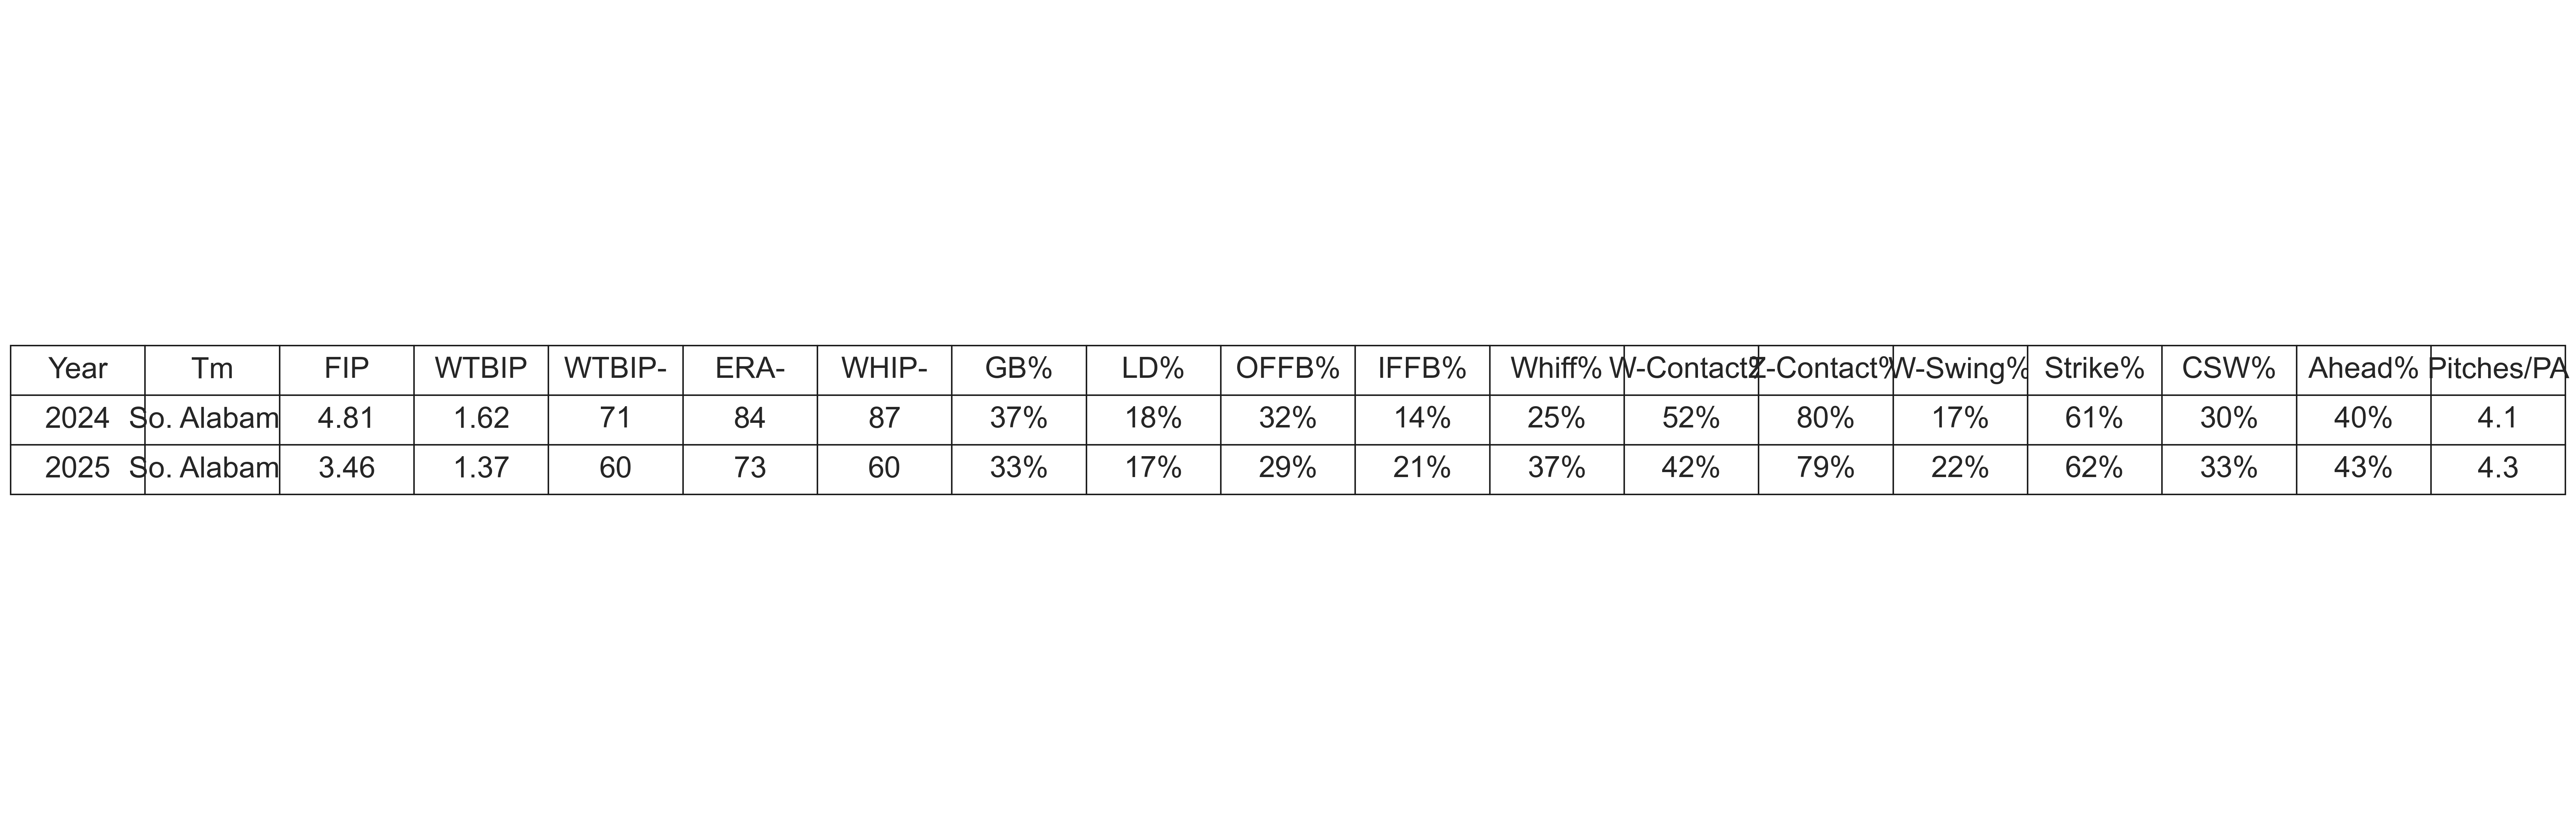

In [53]:
def advanced_stats_table(ax: plt.Axes):

    #CHANGE, years can be added if necessary
    data = {
       "Year": ["2024", "2025"],
        "Tm": ["So. Alabama", "So. Alabama"],
        "FIP": [4.81, 3.46],
        "WTBIP": [1.62, 1.37],
        "WTBIP-": [71, 60],
        "ERA-": [84, 73],
        "WHIP-": [87, 60],
        "GB%": ["37%", "33%"],
        "LD%": ["18%", "17%"],
        "OFFB%": ["32%", "29%"],
        "IFFB%": ["14%", "21%"],
        "Whiff%": ["25%", "37%"],
        "W-Contact%": ["52%", "42%"],
        "Z-Contact%": ["80%", "79%"],
        "W-Swing%": ["17%", "22%"],
        "Strike%": ["61%", "62%"],
        "CSW%": ["30%", "33%"],
        "Ahead%": ["40%", "43%"],
        "Pitches/PA": ["4.1", "4.3"],
    }

    df = pd.DataFrame(data)

    table = ax.table(
        cellText=df.values,  
        colLabels=df.columns,  
        loc='center',   
        cellLoc='center',  
        colLoc='center'  
    )

    table.auto_set_font_size(False)
    table.set_fontsize(20)
    table.scale(3.1, 2.8)

    ax.axis('off')

advanced_stats_table(ax=plt.subplots(figsize=(10, 10))[1])

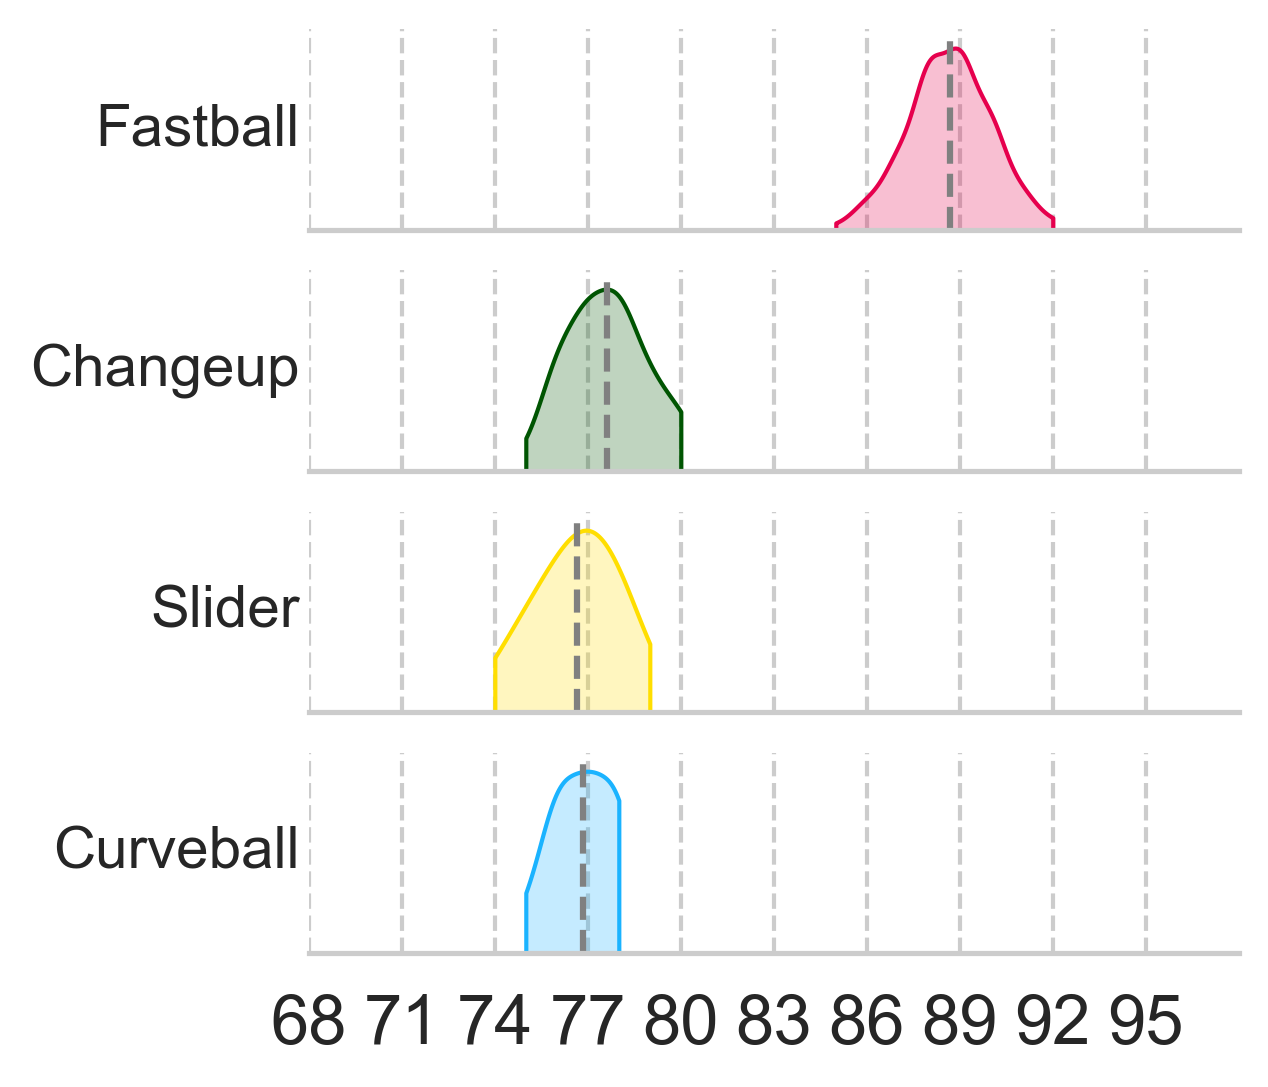

In [21]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
csv_file = r"C:\Users\brend\Downloads\Temp playlist from Synergy Baseball App - 39\Jaxon Shineflew 2025.csv" #CHANGE
df = pd.read_csv(csv_file)
df_filtered = df[df['Velocity'] >= 40]

pitch_counts = df_filtered['Pitch Type'].value_counts()
valid_pitches = pitch_counts[pitch_counts >= 1].index
df_filtered = df_filtered[df_filtered['Pitch Type'].isin(valid_pitches)]

def velocity_dist(df: pd.DataFrame,
                  ax: plt.Axes,
                  gs: gridspec,
                  gs_x: list,
                  gs_y: list,
                  fig: plt.Figure,
                  custom_floor: int = None,
                  custom_ceiling: int = None):

    sorted_value_counts = df['Pitch Type'].value_counts().sort_values(ascending=False)

    items_in_order = sorted_value_counts.index.tolist()

    ax.axis('off')

    inner_grid_1 = gridspec.GridSpecFromSubplotSpec(len(items_in_order), 1, subplot_spec=gs[gs_x[0]:gs_x[-1], gs_y[0]:gs_y[-1]])
    ax_top = []

    for inner in inner_grid_1:
        ax_top.append(fig.add_subplot(inner))

    ax_number = 0

    for i in items_in_order:
        if np.unique(df[df['Pitch Type'] == i]['Velocity']).size == 1:
            ax_top[ax_number].plot([np.unique(df[df['Pitch Type'] == i]['Velocity']),
                                    np.unique(df[df['Pitch Type'] == i]['Velocity'])], [0, 1], linewidth=4,
                                   color=dict_color[df[df['Pitch Type'] == i]['Pitch Type'].values[0]], zorder=20)
        else:
            sns.kdeplot(df[df['Pitch Type'] == i]['Velocity'], ax=ax_top[ax_number], fill=True,
                        clip=(df[df['Pitch Type'] == i]['Velocity'].min(), df[df['Pitch Type'] == i]['Velocity'].max()),
                        color=dict_color[df[df['Pitch Type'] == i]['Pitch Type'].values[0]])

        df_average = df[df['Pitch Type'] == i]['Velocity']
        ax_top[ax_number].plot([df_average.mean(), df_average.mean()],
                       [ax_top[ax_number].get_ylim()[0], ax_top[ax_number].get_ylim()[1]],
                       color='grey',
                       linestyle='--')

        x_min = custom_floor if custom_floor is not None else math.floor(df['Velocity'].min() / 5) * 5 - 5
        x_max = custom_ceiling if custom_ceiling is not None else math.ceil(df['Velocity'].max() / 5) * 5

        ax_top[ax_number].set_xlim(x_min, x_max)
        ax_top[ax_number].set_xlabel('')
        ax_top[ax_number].set_ylabel('')

        if ax_number < len(items_in_order) - 1:
            ax_top[ax_number].spines['top'].set_visible(False)
            ax_top[ax_number].spines['right'].set_visible(False)
            ax_top[ax_number].spines['left'].set_visible(False)
            ax_top[ax_number].tick_params(axis='x', colors='none')

        ax_top[ax_number].set_xticks(np.arange(x_min, x_max, 3))
        ax_top[ax_number].set_yticks([])
        ax_top[ax_number].grid(axis='x', linestyle='--')

        ax_top[ax_number].text(-0.01, 0.5, i, transform=ax_top[ax_number].transAxes,
                               fontsize=14, va='center', ha='right')
        ax_number += 1

    ax_top[-1].spines['top'].set_visible(False)
    ax_top[-1].spines['right'].set_visible(False)
    ax_top[-1].spines['left'].set_visible(False)

    ax_top[-1].set_xticks(list(np.arange(x_min, x_max, 3)))
    ax_top[-1].set_xlabel('')

fig, ax = plt.subplots(figsize=(4, 4))
velocity_dist(df=df_filtered,
              ax=ax,
              gs=gridspec.GridSpec(1, 1),
              gs_x=[0, 1],
              gs_y=[0, 1],
              fig=fig,
              custom_floor=68, #CHANGE?
              custom_ceiling=98)

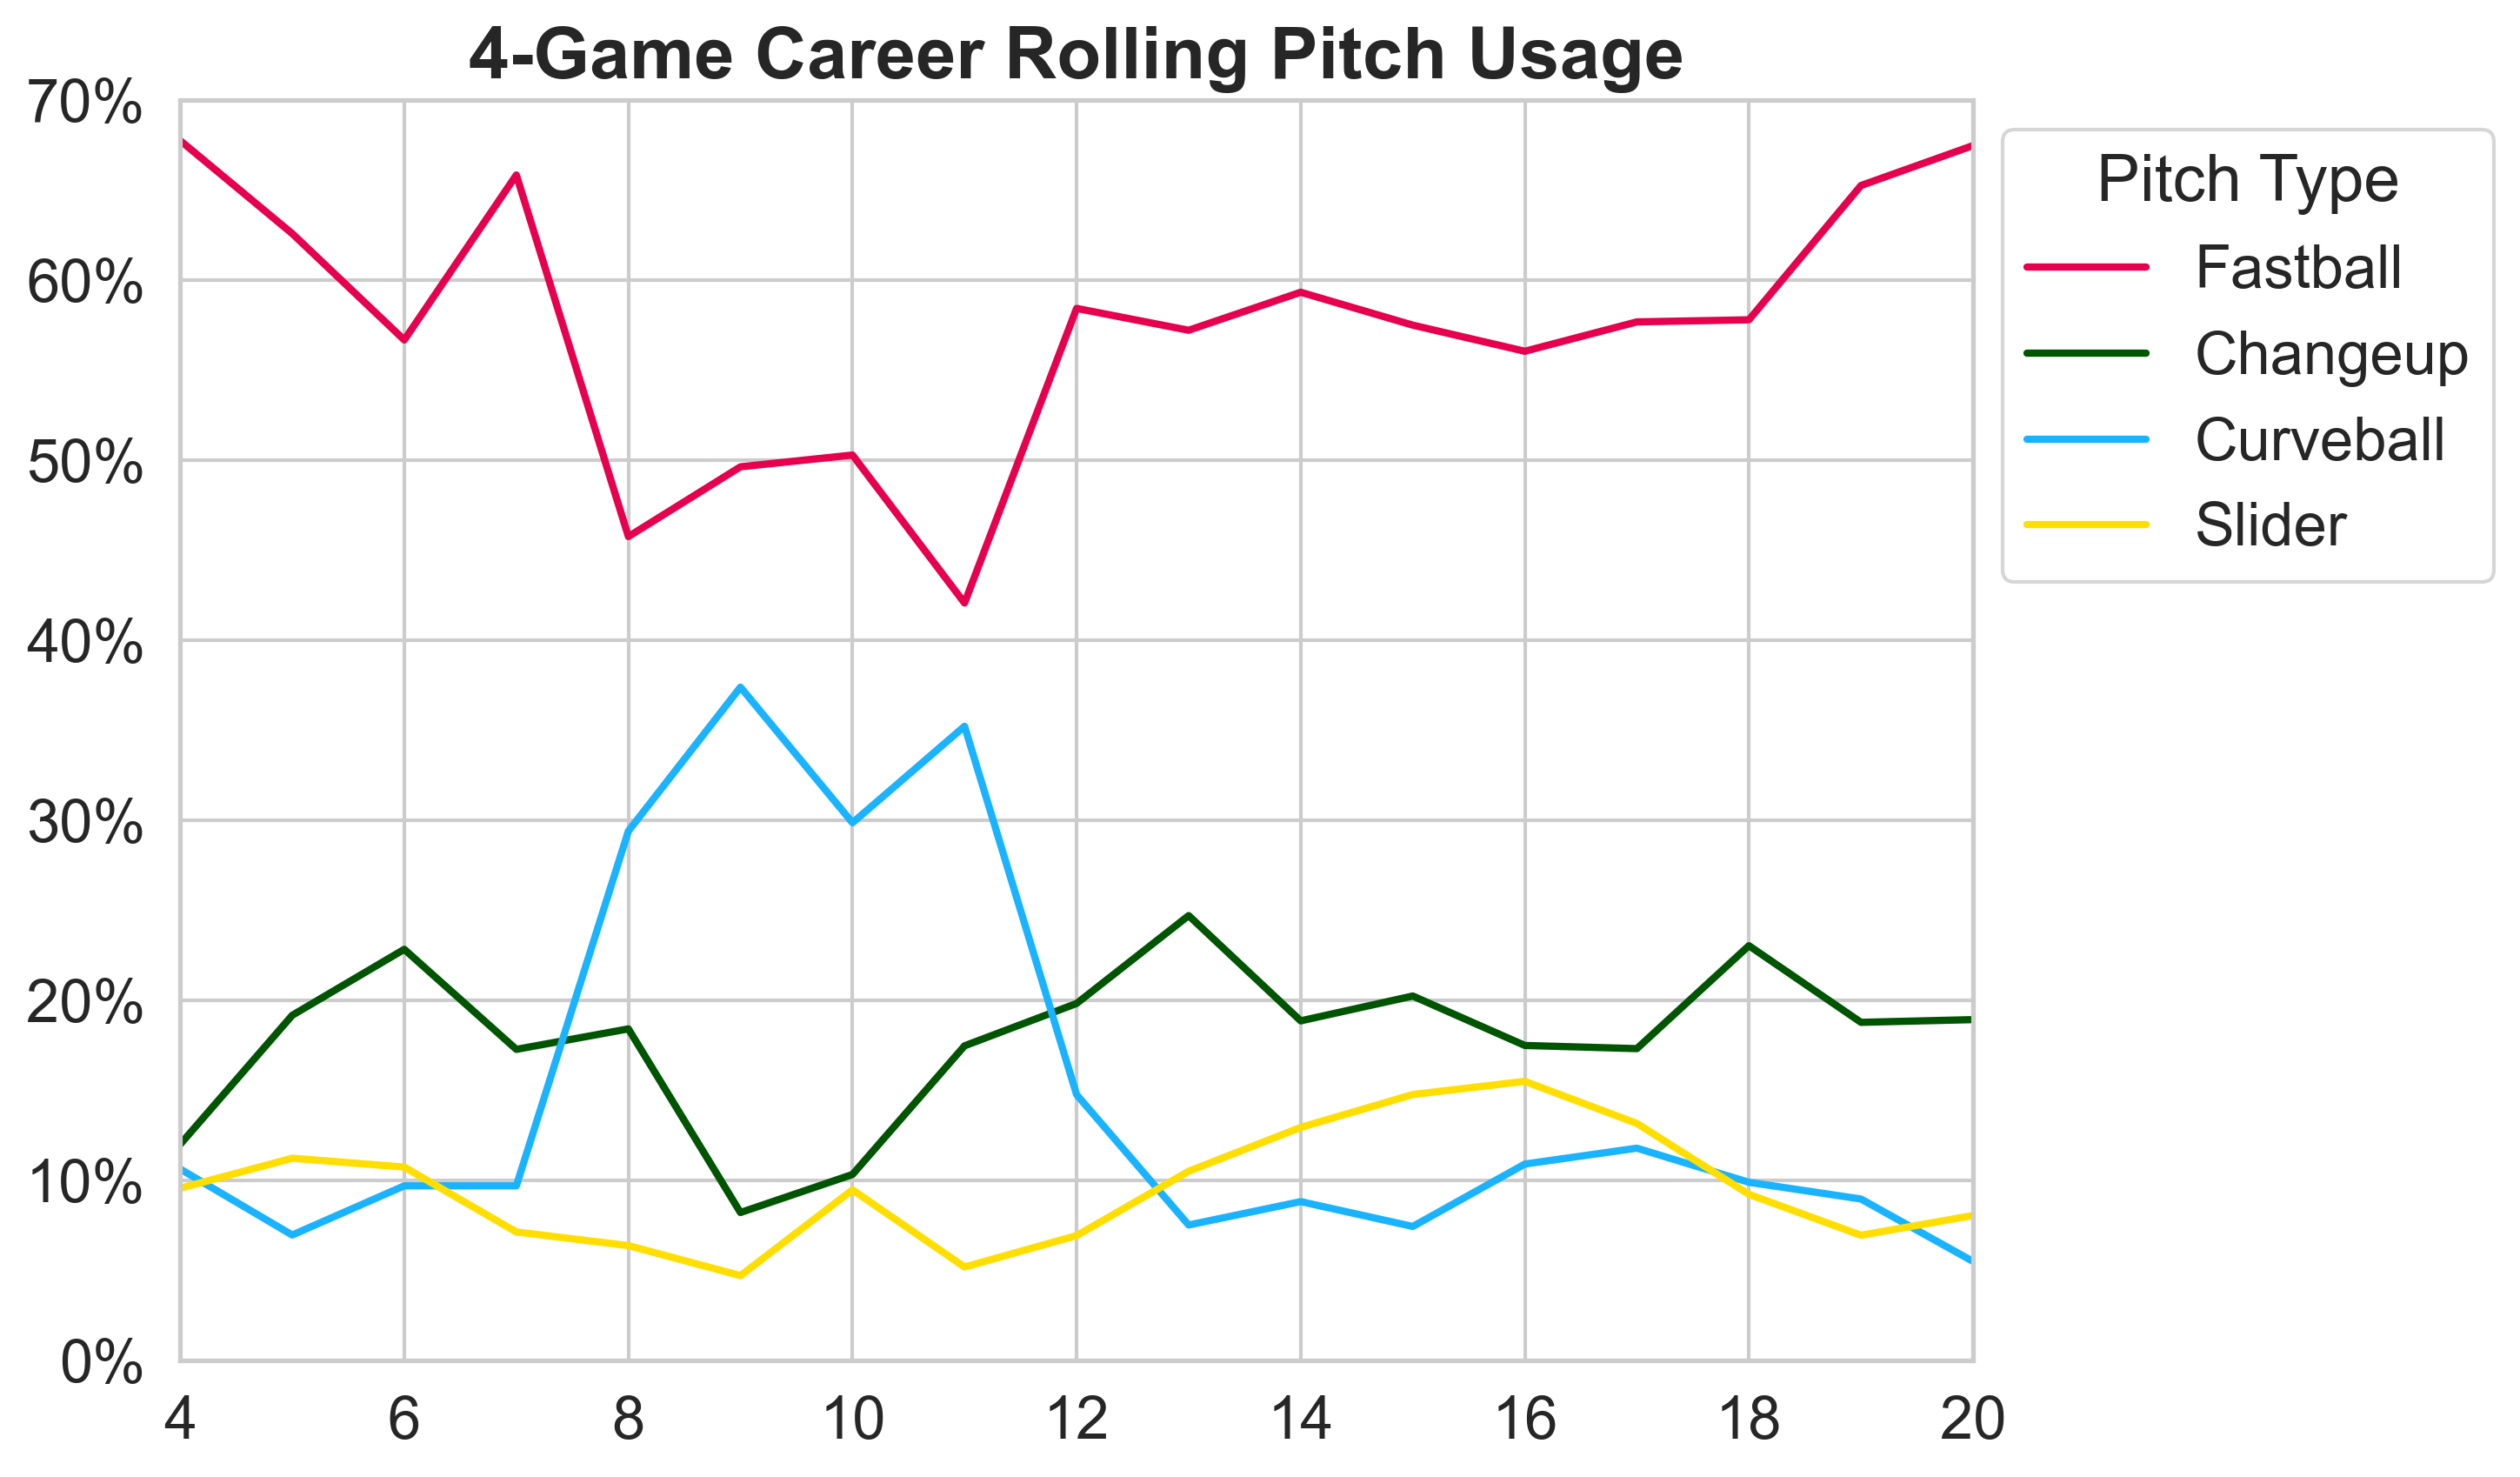

In [91]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

def rolling_pitch_usage(file_path: str, ax: plt.Axes, dict_color: dict, window: int):

    df = pd.read_csv(file_path)
    
    df['Date'] = pd.to_datetime(df['Date'])

    df_grouped = (
        df.groupby(['Date', 'Pitch Type'])['Velocity'].count() /
        df.groupby(['Date'])['Velocity'].count()
    ).reset_index(name='Pitch Usage') 

    all_games = pd.Series(df_grouped['Date'].unique())

    all_pitch_types = pd.Series(df_grouped['Pitch Type'].unique())

    all_combinations = pd.MultiIndex.from_product(
        [all_games, all_pitch_types], names=['Date', 'Pitch Type']
    ).to_frame(index=False)

    df_complete = pd.merge(all_combinations, df_grouped, on=['Date', 'Pitch Type'], how='left')

    df_complete['Pitch Usage'] = df_complete['Pitch Usage'].fillna(0)

    df_complete = df_complete.sort_values(by='Date')
    df_complete['game_number'] = df_complete.groupby('Date').ngroup() + 1

    sorted_value_counts = df['Pitch Type'].value_counts().sort_values(ascending=False)
    items_in_order = sorted_value_counts.index.tolist()
    max_roll = []

    for pitch_type in items_in_order:
        pitch_data = df_complete[df_complete['Pitch Type'] == pitch_type]
        roll_values = pitch_data['Pitch Usage'].rolling(window).mean()
        sns.lineplot(
            x=pitch_data['game_number'],
            y=roll_values,
            label=pitch_type,
            ax=ax, 
            linewidth=2,
            color=dict_color.get(pitch_type, 'black')
        )
        max_roll.append(roll_values.max())

    ax.set_xlim(window, df_complete['game_number'].max())
    ax.set_ylim(0, math.ceil(max(max_roll) * 10) / 10)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f"{window}-Game Career Rolling Pitch Usage", fontweight='bold', fontsize=20)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Pitch Type')

file_path = r"C:\Users\brend\Downloads\Temp playlist from Synergy Baseball App - 40\Jaxon Shineflew.csv" #CHANGE
fig, ax = plt.subplots(figsize=(10, 6))
rolling_pitch_usage(file_path, ax=ax, dict_color=dict_color, window=4) #CHANGE (Depending on how many games he has played)
plt.tight_layout()
plt.show()

In [25]:
table_columns = [
    'Opposing Hitter',
    'Usage',
    'Whiff%',
    'W-Swing%',
    'Take K%',
    'OBP',
    'SLG'
]

column_mapping = {
    'opposing_hitter': 'Opposing Hitter',
    'pitch_usage': 'Usage',
    'whiff_rate': 'Whiff%',
    'chase_rate': 'W-Swing%',
    'Take_K': 'Take K%',
    'OBP': 'OBP',
    'SLG': 'SLG'
}

#CHANGE pitches, stats, and order
data = {
    'Fastball': [
        {'opposing_hitter': 'RHH', 'pitch_usage': .58, 'whiff_rate': 0.19, 'chase_rate': 0.19, 'Take_K': 0.18, 'OBP': 0.330, 'SLG': 0.438},
        {'opposing_hitter': 'LHH', 'pitch_usage': .66, 'whiff_rate': 0.29, 'chase_rate': 0.13, 'Take_K': 0.25, 'OBP': 0.390, 'SLG': 0.333},
    ],
    'Changeup': [
        {'opposing_hitter': 'RHH', 'pitch_usage': 0.23, 'whiff_rate': 0.44, 'chase_rate': 0.18, 'Take_K': 0.15, 'OBP': 0.269, 'SLG': 0.250},
        {'opposing_hitter': 'LHH', 'pitch_usage': 0.07, 'whiff_rate': 0.36, 'chase_rate': 0.22, 'Take_K': 0.10, 'OBP': 0.286, 'SLG': 0.167},
    ],
    'Curveball': [
        {'opposing_hitter': 'RHH', 'pitch_usage': 0.10, 'whiff_rate': 0.45, 'chase_rate': 0.24, 'Take_K': 0.16, 'OBP': 0.182, 'SLG': 0.000},
        {'opposing_hitter': 'LHH', 'pitch_usage': 0.17, 'whiff_rate': 0.43, 'chase_rate': 0.30, 'Take_K': 0.13, 'OBP': 0.188, 'SLG': 0.071},
    ],
    'Slider': [
        {'opposing_hitter': 'RHH', 'pitch_usage': 0.09, 'whiff_rate': 0.19, 'chase_rate': 0.12, 'Take_K': 0.17, 'OBP': 0.182, 'SLG': 0.100},
        {'opposing_hitter': 'LHH', 'pitch_usage': 0.11, 'whiff_rate': 0.30, 'chase_rate': 0.10, 'Take_K': 0.12, 'OBP': 0.333, 'SLG': 0.375},
    ],
}

flattened_data = []
for pitch_type, entries in data.items():
    for entry in entries:
        entry['pitch_type'] = pitch_type
        flattened_data.append(entry)

df_combined = pd.DataFrame(flattened_data)

df_combined = df_combined.rename(columns=column_mapping)

def format_percentage_columns(row):
    for col in ['Usage', 'Whiff%', 'W-Swing%', 'Take K%']:
        row[col] = f"{row[col] * 100:.1f}%"
    for col in ['OBP', 'SLG']:
        row[col] = f"{row[col]:.3f}"
    return row

df_combined = df_combined.apply(format_percentage_columns, axis=1)

print(df_combined)

  Opposing Hitter  Usage Whiff% W-Swing% Take K%    OBP    SLG pitch_type
0             RHH  58.0%  19.0%    19.0%   18.0%  0.330  0.438   Fastball
1             LHH  66.0%  29.0%    13.0%   25.0%  0.390  0.333   Fastball
2             RHH  23.0%  44.0%    18.0%   15.0%  0.269  0.250   Changeup
3             LHH   7.0%  36.0%    22.0%   10.0%  0.286  0.167   Changeup
4             RHH  10.0%  45.0%    24.0%   16.0%  0.182  0.000  Curveball
5             LHH  17.0%  43.0%    30.0%   13.0%  0.188  0.071  Curveball
6             RHH   9.0%  19.0%    12.0%   17.0%  0.182  0.100     Slider
7             LHH  11.0%  30.0%    10.0%   12.0%  0.333  0.375     Slider


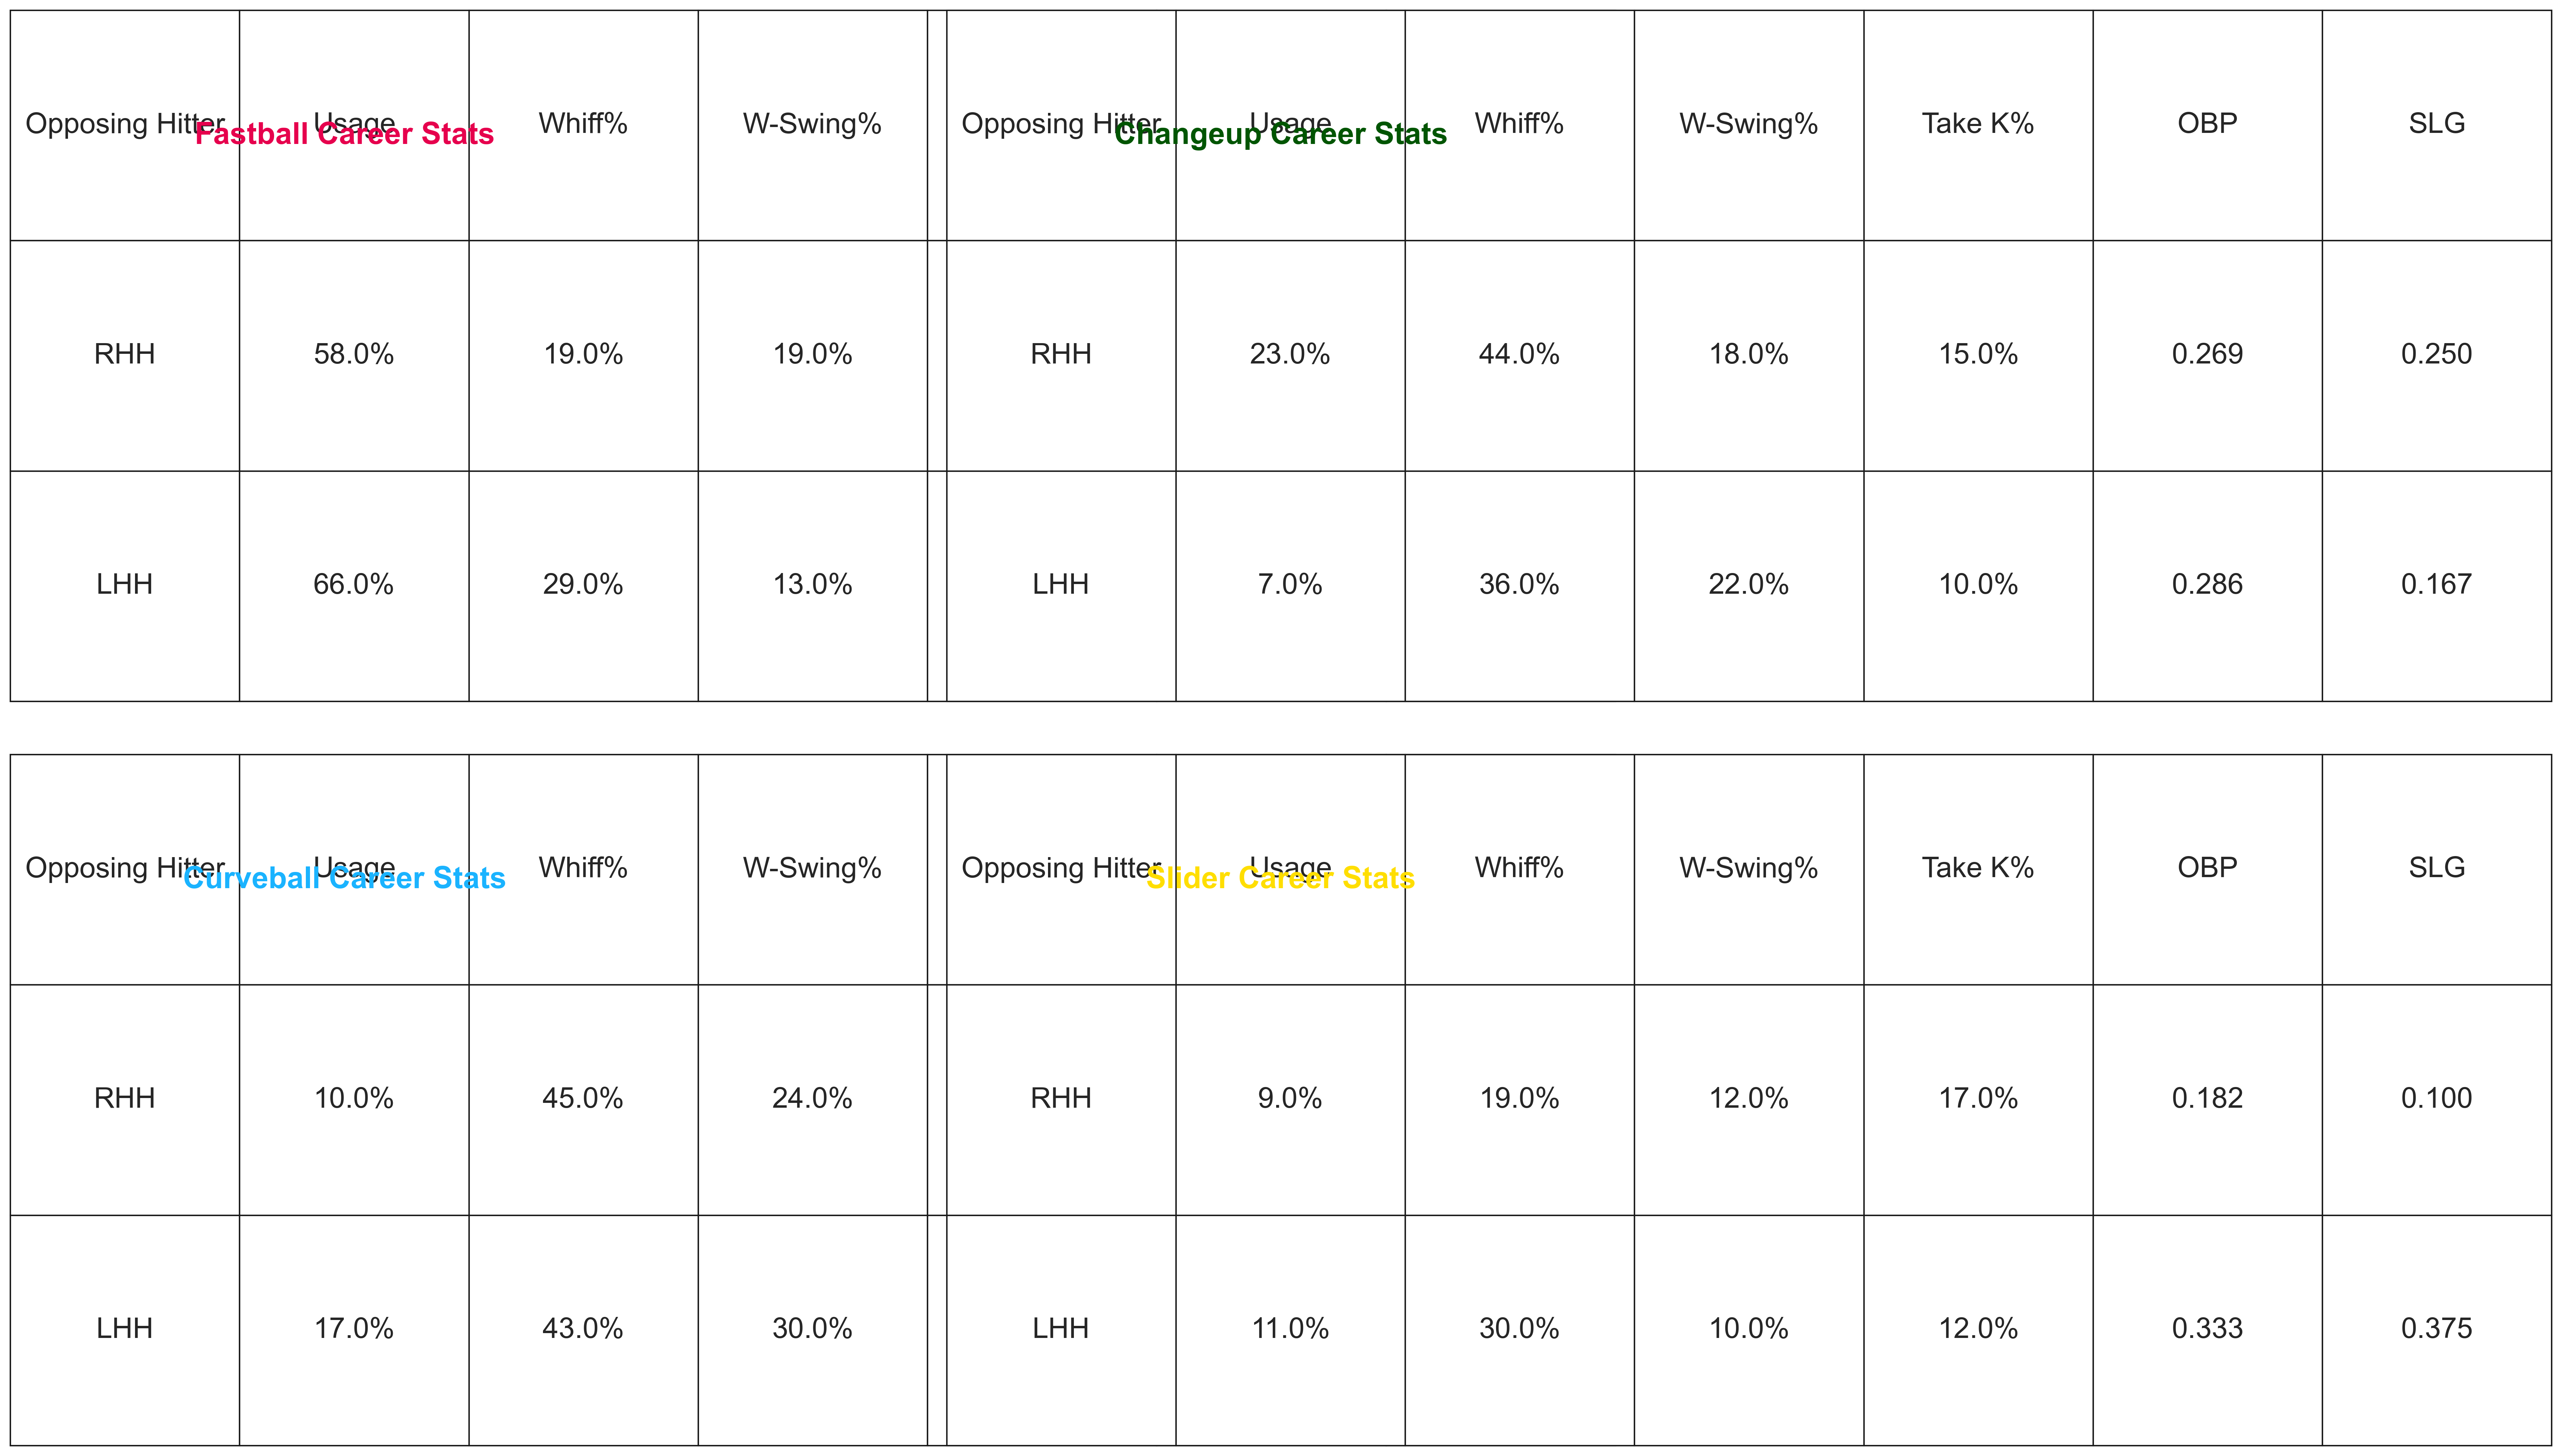

In [41]:
def pitch_splits(ax, data, pitch_type, table_columns, pitch_colors):
    subset = data[data['pitch_type'] == pitch_type]
    if subset.empty:
        print(f"No data available for pitch type: {pitch_type}")
        return
    
    table_data = subset[table_columns].values
    col_labels = table_columns

    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(cellText=table_data, colLabels=col_labels, loc='center', cellLoc='center', bbox=[0, 0, 2.4, 1.3])
    
    table.auto_set_font_size(False)
    table.set_fontsize(20)
    
    num_cols = len(col_labels)
    width = 1 / num_cols
    
    for i in range(num_cols):
        for key, cell in table.get_celld().items():
            if key[1] == i: 
                cell.set_width(width)
    
    title_color = pitch_colors.get(pitch_type, {}).get('color', 'black')
    
    ax.set_title(f"{pitch_type} Career Stats", fontsize=21, fontweight='bold', pad=18, color=title_color)

num_pitch_types = len(df_combined['pitch_type'].unique())

num_cols = 2
num_rows = (num_pitch_types + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 8))

axes = axes.flatten()

for idx, (ax, pitch) in enumerate(zip(axes, df_combined['pitch_type'].unique())):
    pitch_splits(ax=ax, data=df_combined, pitch_type=pitch, table_columns=table_columns, pitch_colors=pitch_colors)

for idx in range(num_pitch_types, len(axes)):
    fig.delaxes(axes[idx])

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

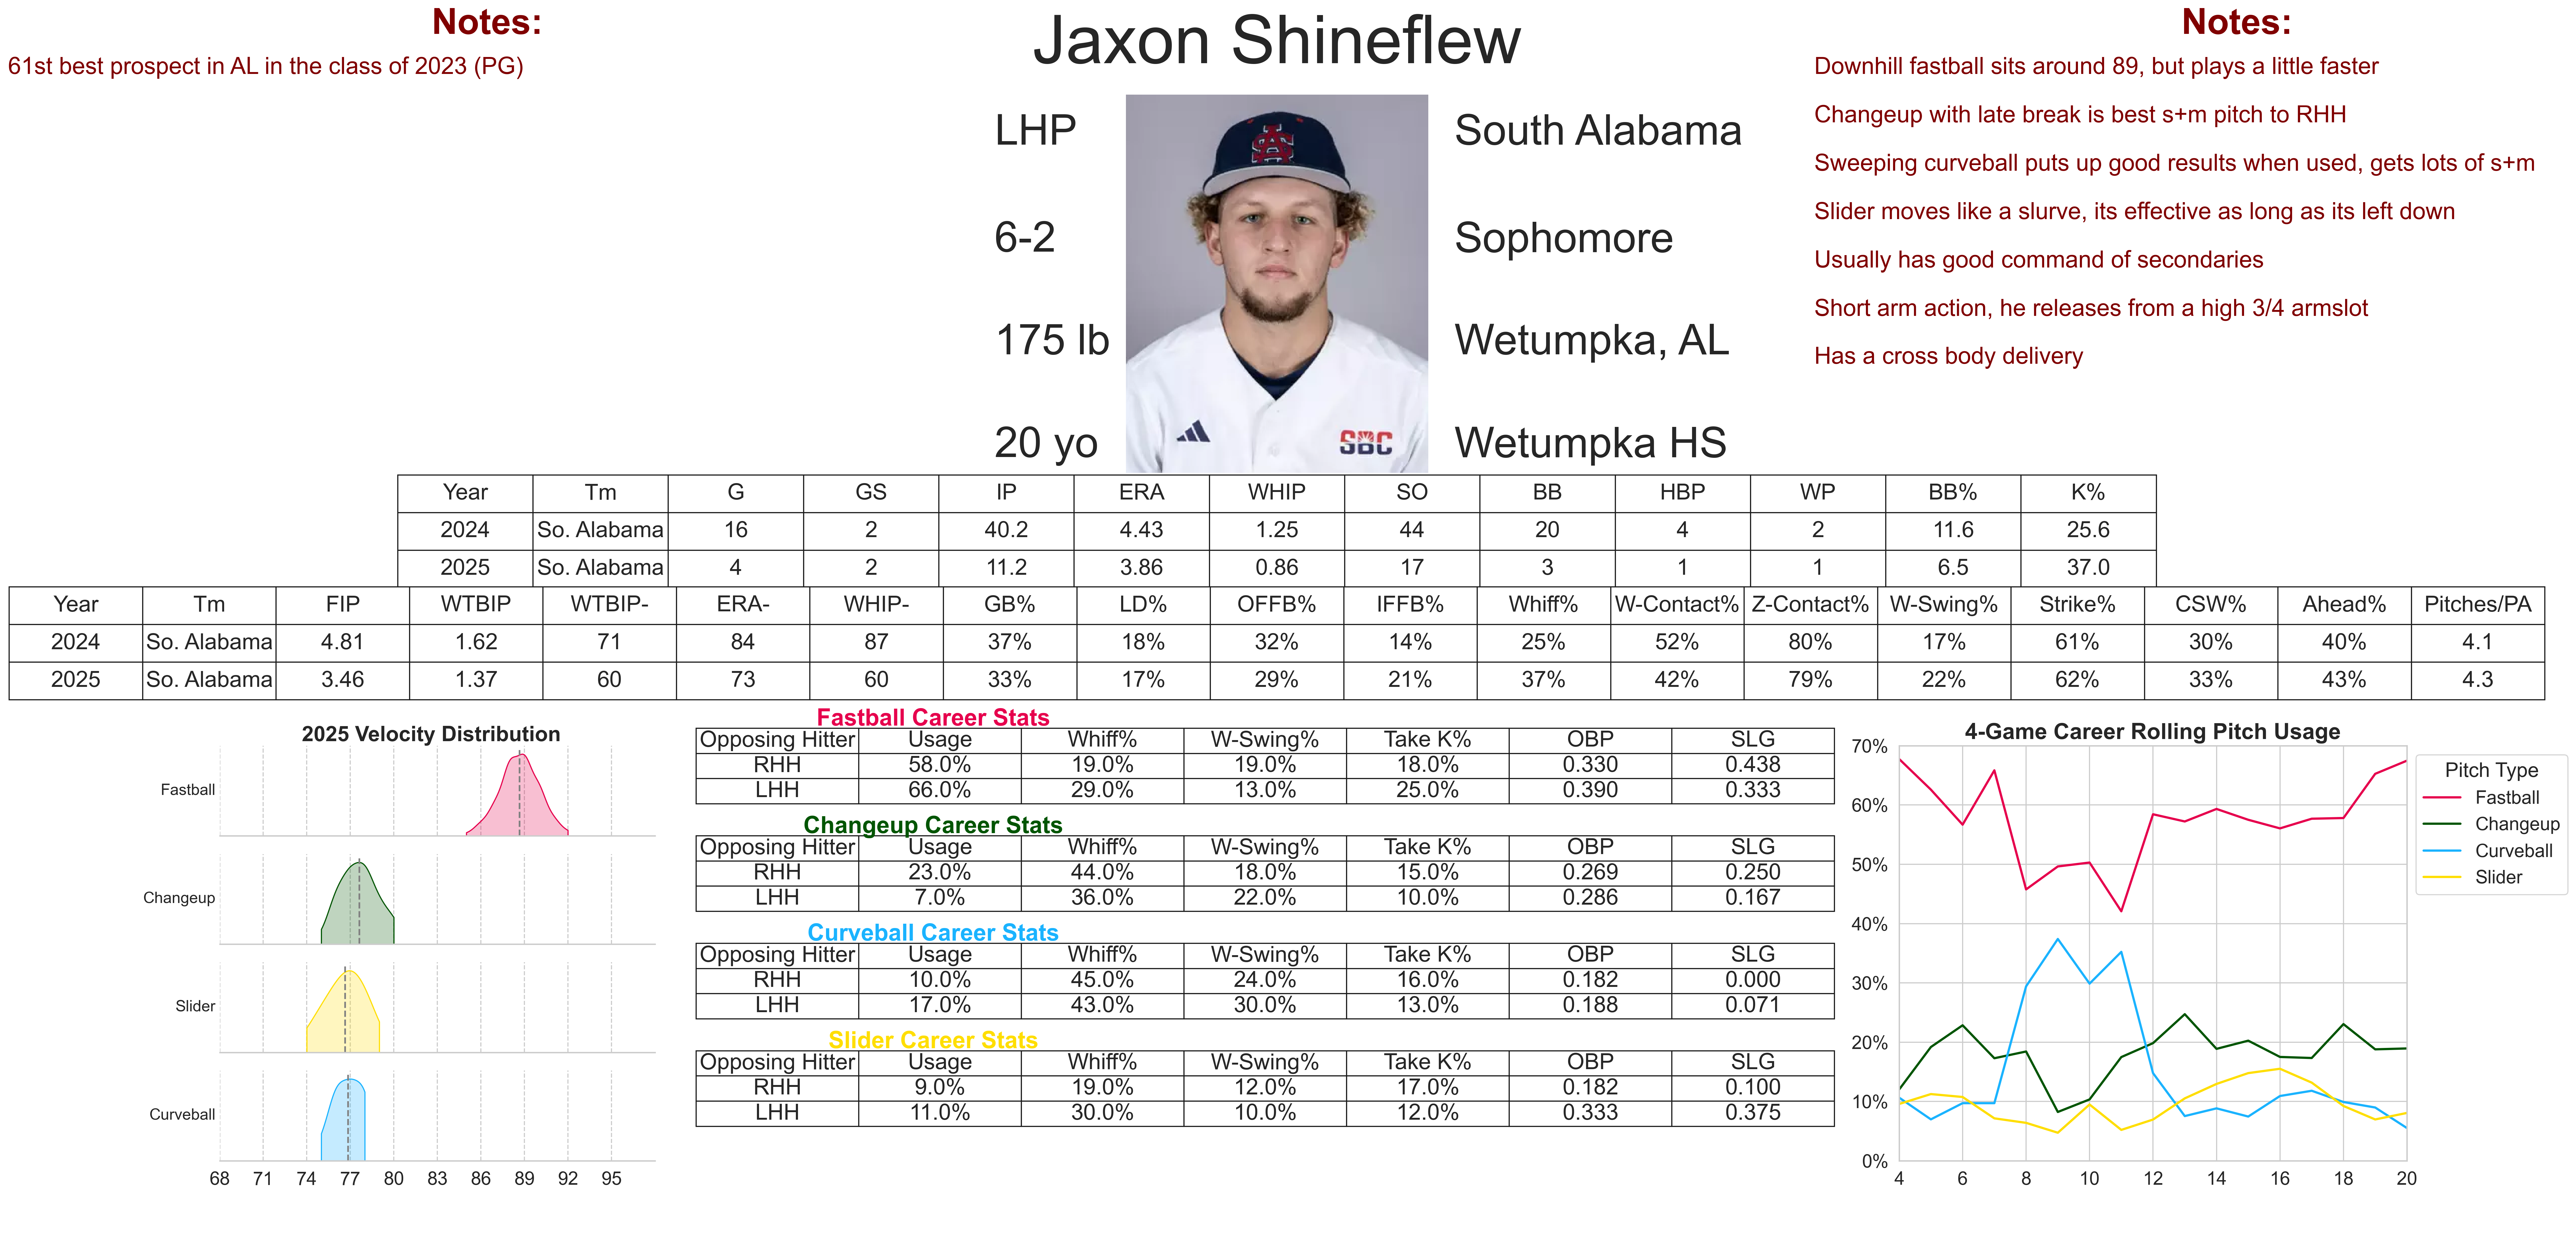

In [133]:
def pitching_dashboard():

    fig = plt.figure(figsize=(35, 20))

    gs = gridspec.GridSpec(14, 9,
                        height_ratios=[2,0,23,1,9,3,1,3,1,3,1,3,1,3],
                        width_ratios=[60,18,18,18,18,18,18,18,70])

    ax_name = fig.add_subplot(gs[1,2:7])
    ax_headshot = fig.add_subplot(gs[2,2:7])
    ax_bio = fig.add_subplot(gs[2,3:5])
    ax_bstats = fig.add_subplot(gs[3,2:7])
    ax_advstats = fig.add_subplot(gs[4,2:7])
    ax_velocity = fig.add_subplot(gs[13, 0:1])
    ax_rolling_usage = fig.add_subplot(gs[5:13, 8])

    ax_fastball = fig.add_subplot(gs[5, 1:4])
    ax_changeup = fig.add_subplot(gs[7, 1:4])
    ax_curveball = fig.add_subplot(gs[9, 1:4])
    ax_slider = fig.add_subplot(gs[11, 1:4])
    
    #CHANGE year to most recent
    fig.suptitle('2025 Velocity Distribution', fontsize=19, fontweight='bold', x=.2, y=0.425)

    fontsize = 16

    player_name(ax=ax_name)
    player_headshot(ax=ax_headshot)
    player_bio(ax=ax_bio)
    basic_stats_table(ax=ax_bstats)
    advanced_stats_table(ax=ax_advstats)
    velocity_dist(df=df_filtered, ax=ax_velocity, gs=gs, gs_x=[5, 13], gs_y=[0, 1], fig=fig, custom_floor=68, custom_ceiling=98)
    rolling_pitch_usage(file_path, ax=ax_rolling_usage, dict_color=dict_color, window=4)

    #CHANGE pitches
    pitch_splits(ax=ax_fastball, data=df_combined, pitch_type='Fastball', table_columns=table_columns, pitch_colors=pitch_colors)
    pitch_splits(ax=ax_changeup, data=df_combined, pitch_type='Changeup', table_columns=table_columns, pitch_colors=pitch_colors)
    pitch_splits(ax=ax_curveball, data=df_combined, pitch_type='Curveball', table_columns=table_columns, pitch_colors=pitch_colors)
    pitch_splits(ax=ax_slider, data=df_combined, pitch_type='Slider', table_columns=table_columns, pitch_colors=pitch_colors)

    #CHANGE
    notes(fig, x=0.2, y=.87, text="Notes:", fontsize=32, fontweight='bold', color='maroon')
    notes(fig, x=0.05, y=0.84, text="61st best prospect in AL in the class of 2023 (PG)", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.05, y=0.81, text="", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.05, y=0.78, text="", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.05, y=0.75, text="", fontsize=21, fontweight='normal', color='maroon')

    notes(fig, x=0.82, y=.87, text="Notes:", fontsize=32, fontweight='bold', color='maroon')
    notes(fig, x=0.69, y=0.84, text="Downhill fastball sits around 89, but plays a little faster", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.81, text="Changeup with late break is best s+m pitch to RHH", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.78, text="Sweeping curveball puts up good results when used, gets lots of s+m", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.75, text="Slider moves like a slurve, its effective as long as its left down", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.72, text="Usually has good command of secondaries", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.69, text="Short arm action, he releases from a high 3/4 armslot", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.66, text="Has a cross body delivery", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.63, text="", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.6, text="", fontsize=21, fontweight='normal', color='maroon')
    notes(fig, x=0.69, y=0.57, text="", fontsize=21, fontweight='normal', color='maroon')
    
    plt.show()

pitching_dashboard()